<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss, accuracy_score
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/diabetes.csv'
diabetes = pd.DataFrame(pd.read_csv(file_path))
diabetes.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.isnull().sum()*100/diabetes.shape[0]

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [5]:
x = diabetes.iloc[:,[0,1,2,3,4,5,6,7]].to_numpy()  #Features
y = diabetes.iloc[:,8].values  #Target

In [6]:
column_names = diabetes.columns.tolist()
x_columns = [column_names[i] for i in [0,1,2,3,4,5,6,7]]
y_column = column_names[8]
print(f"Columns assigned to x: {x_columns}")
print(f"Column assigned to y: {y_column}")

Columns assigned to x: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Column assigned to y: Outcome


In [7]:
x[0:10]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0) #80% - 20% split

In [9]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_sc, Y_train)

LogisticRegression(random_state=0)

In [11]:
Y_pred = classifier.predict(X_test_sc)

In [12]:
Y_pred[0:9]

array([1, 0, 0, 1, 0, 0, 1, 1, 0])

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 Score: 0.6823529411764706


In [14]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[98,  9],
       [18, 29]])

Text(0.5, 427.9555555555555, 'Predicted label')

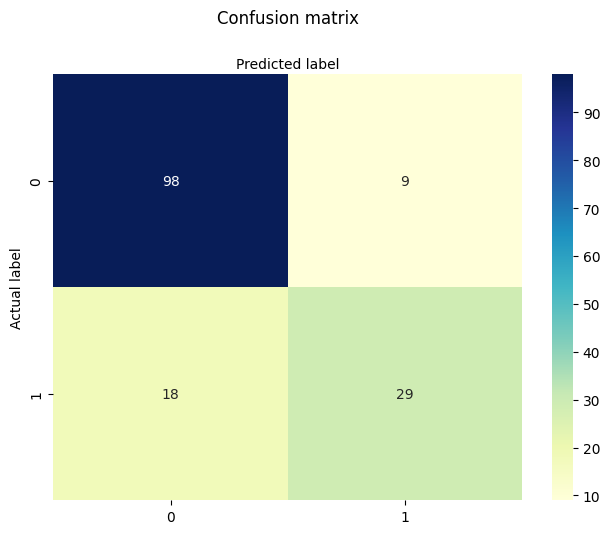

In [15]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# PROBLEM 2A



In [16]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))
cancer.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [17]:
cancer.shape

(569, 33)

In [18]:
x1 = cancer.iloc[:,2:30].values  #Features
y1 = cancer.iloc[:,1].values  #Target

In [19]:
x[0:10]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [20]:
column_names = cancer.columns.tolist()
x_columns = [column_names[i] for i in (2,30)]
y_column = column_names[1]
print(f"Columns assigned to x: {x_columns}")
print(f"Column assigned to y: {y_column}")

Columns assigned to x: ['radius_mean', 'symmetry_worst']
Column assigned to y: diagnosis


In [21]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1, y1, test_size=0.20, random_state=0) #80% - 20% split

In [22]:
scaler1 = StandardScaler()
X1_train_sc = scaler1.fit_transform(X1_train)
X1_test_sc = scaler1.transform(X1_test)

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X1_train_sc, Y1_train)

LogisticRegression(random_state=0)

In [24]:
Y1_pred = classifier.predict(X1_test_sc)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:",metrics.accuracy_score(Y1_test, Y1_pred))
print("Precision:", metrics.precision_score(Y1_test, Y1_pred, pos_label='M'))
print("Recall:", metrics.recall_score(Y1_test, Y1_pred, pos_label='M'))
f1a = f1_score(Y1_test, Y1_pred,pos_label='M')
print(f"F1 Score: {f1a}")

Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1 Score: 0.9462365591397849


In [26]:
from sklearn.metrics import confusion_matrix
cnf_matrix2 = confusion_matrix(Y1_test, Y1_pred)
cnf_matrix2

array([[65,  2],
       [ 3, 44]])

Text(0.5, 427.9555555555555, 'Predicted label')

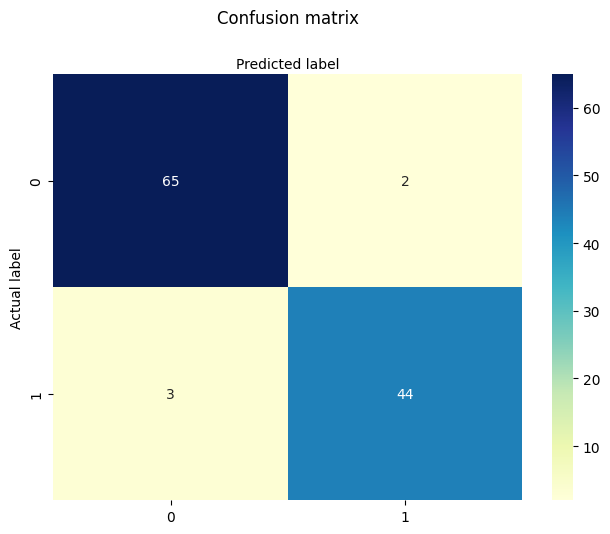

In [27]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# PROBLEM 2B

In [28]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))
cancer.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [29]:
x2 = cancer.iloc[:,2:30].values  #Features
y2 = cancer.iloc[:,1].values  #Target

In [30]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size=0.20, random_state=0) #80% - 20% split

In [31]:
scaler = StandardScaler()
X2_train_std = scaler.fit_transform(X2_train)
X2_test_std = scaler.transform(X2_test)

In [32]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X2_train, Y2_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X2_train_std, Y2_train))
    print('Test accuracy:', clf.score(X2_test_std, Y2_test))
    print('')

C: 10
Training accuracy: 0.9142857142857143
Test accuracy: 0.8771929824561403



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C: 1
Training accuracy: 0.5384615384615384
Test accuracy: 0.5526315789473685

C: 0.1
Training accuracy: 0.23296703296703297
Test accuracy: 0.22807017543859648

C: 0.001
Training accuracy: 0.13406593406593406
Test accuracy: 0.12280701754385964



In [33]:
model = LogisticRegression(solver='liblinear')
model.fit(X2_train, Y2_train)
predicted1 = model.predict(X2_test)
report1 = classification_report(Y2_test, predicted1)
print(report1)

              precision    recall  f1-score   support

           B       0.98      0.94      0.96        67
           M       0.92      0.98      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [34]:
model = LogisticRegression(solver='liblinear')
model.fit(X2_train, Y2_train)
predicted1 = model.predict(X2_test)
matrix1= confusion_matrix(Y2_test, predicted1)
print(matrix1)

[[63  4]
 [ 1 46]]


Text(0.5, 427.9555555555555, 'Predicted label')

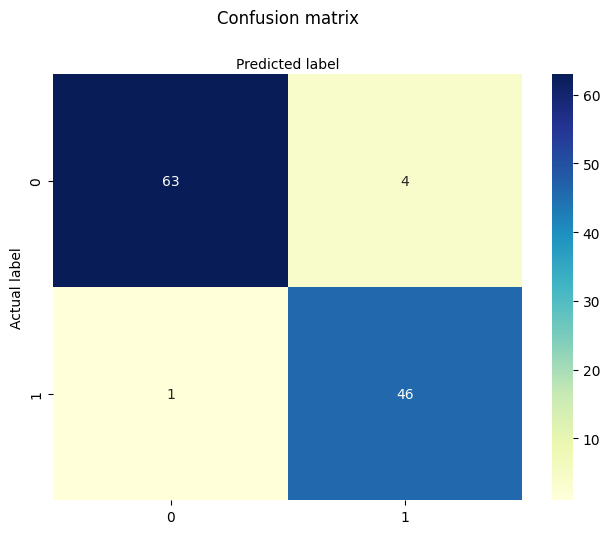

In [35]:
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# PROBLEM 3

In [36]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))
cancer.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [37]:
x3 = cancer.iloc[:,2:30].values  #Features
y3 = cancer.iloc[:,1].values  #Target

In [38]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(x3, y3, test_size=0.20, random_state=0) #80% - 20% split

In [39]:
scaler3 = StandardScaler()
X3_train_sc = scaler3.fit_transform(X3_train)
X3_test_sc = scaler3.transform(X3_test)

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
# Initialize and train the Naive Bayes model
model3 = GaussianNB()
model3.fit(X3_train_sc, Y3_train)

# Make predictions
Y3_pred = model3.predict(X3_test_sc)

# Evaluate the model
print(metrics.classification_report(Y3_test, Y3_pred))


              precision    recall  f1-score   support

           B       0.93      0.93      0.93        67
           M       0.89      0.89      0.89        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [41]:
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(Y3_test, Y3_pred)
cnf_matrix1

array([[62,  5],
       [ 5, 42]])

Text(0.5, 427.9555555555555, 'Predicted label')

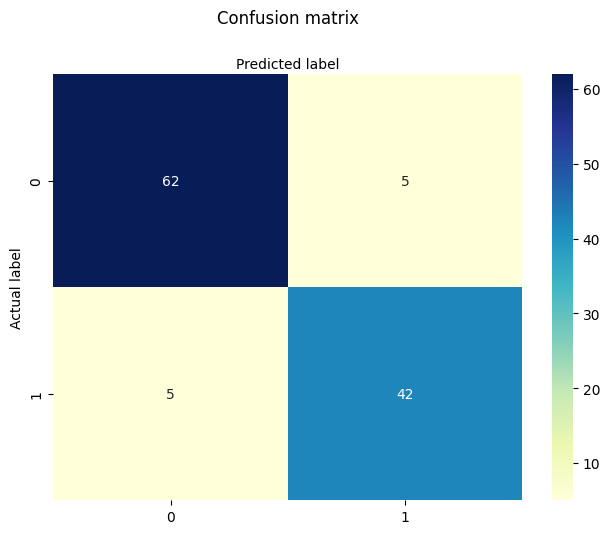

In [42]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# PROBLEM 4

In [43]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))
cancer.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [44]:
x4 = cancer.iloc[:,2:30].values  #Features
y4 = cancer.iloc[:,1].values  #Target

In [45]:
X4_train, X4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.20, random_state=0) #80% - 20% split

In [46]:
scaler4 = StandardScaler()
X4_train_sc = scaler4.fit_transform(X4_train)
X4_test_sc = scaler4.transform(X4_test)

In [47]:
from sklearn.decomposition import PCA
max_features = X4_train_sc.shape[1]
best_accuracy = 0
best_k = 0
best_precision = 0
best_recall = 0
best_f1 = 0

In [48]:
for k in range(1, max_features + 1):
    # Apply PCA and reduce features
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X4_train)
    X_test_pca = pca.transform(X4_test)

    # Train a logistic regression model
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_pca, y4_train)
    y_pred = clf.predict(X_test_pca)

    accuracy = accuracy_score(y4_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_precision = precision_score(y4_test, y_pred,pos_label='M')
        best_recall = recall_score(y4_test, y_pred,pos_label='M')
        best_f1 = f1_score(y4_test, y_pred,pos_label='M')

print(f"Best K: {best_k}")
print("Accuracy for best K: ", best_accuracy)
print("Precision for best K: ", best_precision)
print("Recall for best K: ", best_recall)
print("F1 Score for best K: ", best_f1)

Best K: 2
Accuracy for best K:  0.9473684210526315
Precision for best K:  0.9555555555555556
Recall for best K:  0.9148936170212766
F1 Score for best K:  0.9347826086956522


In [49]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))
cancer.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [50]:
x5 = cancer.iloc[:,2:30].values  #Features
y5 = cancer.iloc[:,1].values  #Target

In [51]:
X5_train, X5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.20, random_state=0) #80% - 20% split

In [52]:
scaler5 = StandardScaler()
X5_train_sc = scaler5.fit_transform(X5_train)
X5_test_sc = scaler5.transform(X5_test)

In [53]:
max_features = X5_train_sc.shape[1]
best_accuracy = 0
best_k = 0
best_precision = 0
best_recall = 0
best_f1 = 0

In [54]:
for k in range(1, max_features + 1):
    # Apply PCA and reduce features
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X5_train)
    X_test_pca = pca.transform(X5_test)

In [55]:
    # Train a Naive Bayes classifier
    clf = GaussianNB()  # Creating the Gaussian Naive Bayes classifier
    clf.fit(X_train_pca, y5_train)
    y_pred = clf.predict(X_test_pca)

    accuracy = accuracy_score(y5_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_precision = precision_score(y5_test, y_pred,pos_label='M')
        best_recall = recall_score(y5_test, y_pred,pos_label='M')
        best_f1 = f1_score(y5_test, y_pred,pos_label='M')


print(f"Best K: {best_k}")
print("Accuracy for best K: ", best_accuracy)
print("Precision for best K: ", best_precision)
print("Recall for best K: ", best_recall)
print("F1 Score for best K: ", best_f1)

Best K: 28
Accuracy for best K:  0.9122807017543859
Precision for best K:  0.9111111111111111
Recall for best K:  0.8723404255319149
F1 Score for best K:  0.891304347826087
